In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import seaborn as sns

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

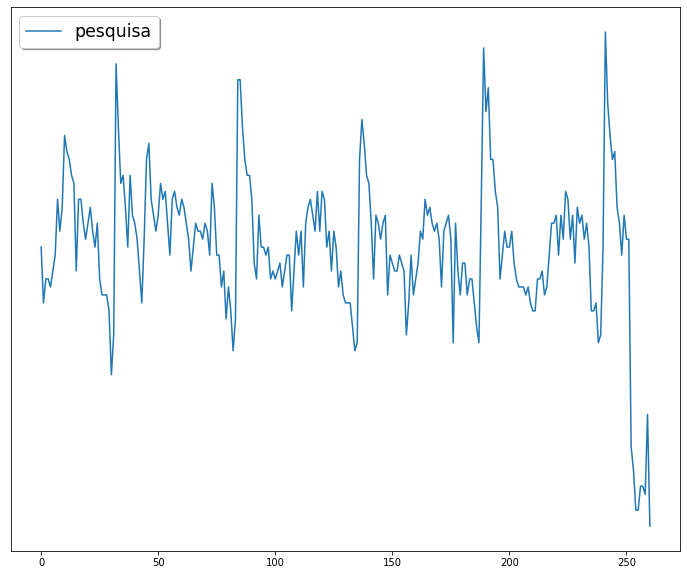

In [2]:
exer = pd.read_csv('/home/otavio/ml/datasets/trends/trends-19-05/academia.csv')
fig, ax = plt.subplots(figsize=(12, 10))
exer.plot(ax=ax)
# plt.xticks([])
plt.yticks([])
ax.legend(loc='upper left', shadow=True, fontsize='xx-large')
fig.savefig('exer.png')

In [3]:
meses = {1: 'Janeiro', 2:'Fevereiro', 
         3:'Março', 4:'Abril', 5:'Maio', 
         6:'Junho', 7:'Julho', 8:'Agosto', 9:'Setembro', 
         10:'Outubro', 11:'Novembro', 12:'Dezembro'}

In [4]:
exer['mes'] = exer['data'].apply(lambda x: int(x.split('-')[1]))
exer['mes_word'] = exer['mes'].map(meses) 


In [5]:
exer_gb = exer.groupby(['mes', 'mes_word'])['pesquisa'].mean().to_frame().reset_index()
exer_gb['pesquisa'] = exer_gb['pesquisa'].apply(lambda x: int(x))
exer_gb.sort_values('mes', ascending=True, inplace=True)

([], <a list of 0 Text yticklabel objects>)

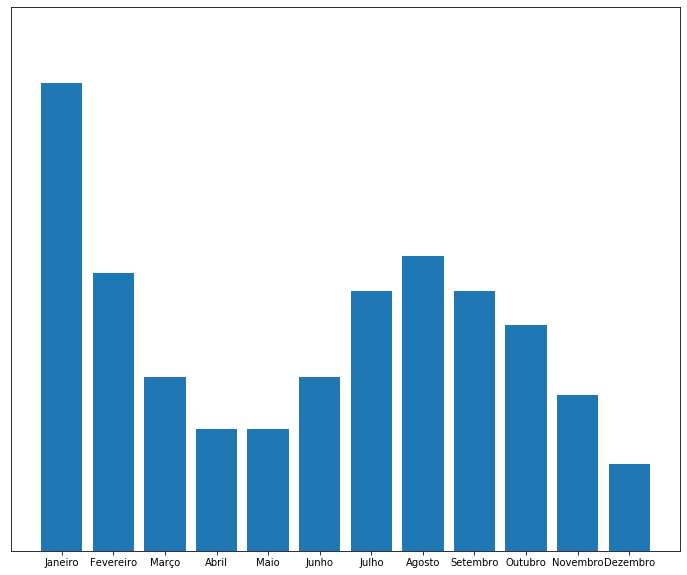

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.bar(exer_gb['mes_word'], exer_gb['pesquisa'])
ax.set_ylim(ymin=60)
plt.yticks([])

In [7]:
def plot_months(path, cut=60, name='out'):
    exer = pd.read_csv(path)
    exer['mes'] = exer['data'].apply(lambda x: int(x.split('-')[1]))
    exer['mes_word'] = exer['mes'].map(meses)
    exer_gb = exer.groupby(['mes', 'mes_word'])['pesquisa'].mean().to_frame().reset_index()
    exer_gb['pesquisa'] = exer_gb['pesquisa'].apply(lambda x: int(x))
    exer_gb.sort_values('mes', ascending=True, inplace=True)
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.bar(exer_gb['mes_word'], exer_gb['pesquisa'])
    ax.set_ylim(ymin=cut)
    plt.yticks([])
    plt.xticks(size=20, rotation=45, horizontalalignment='right')    
    plt.tight_layout()
    plt.savefig(name + '.png')

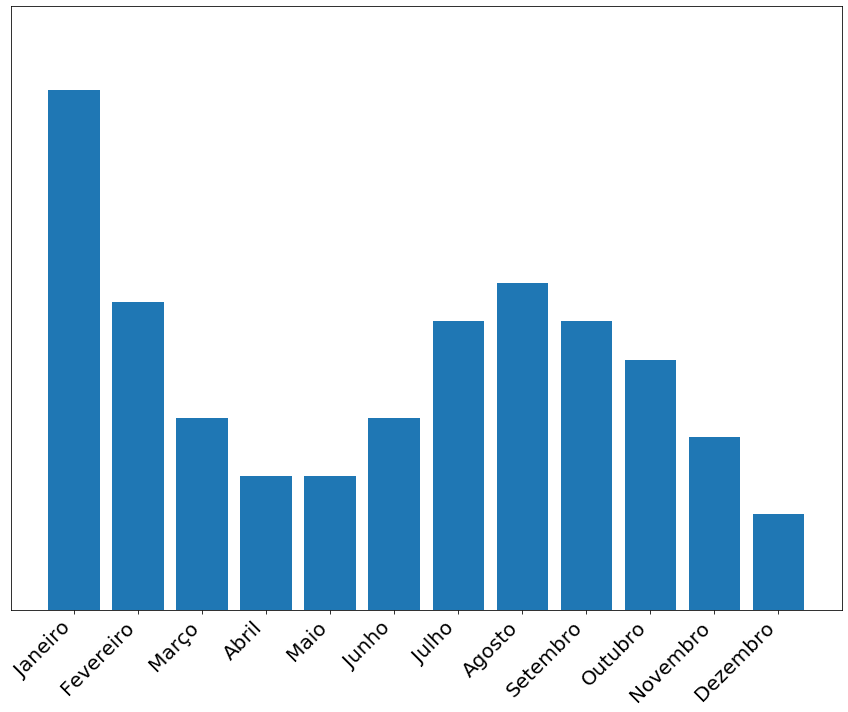

In [8]:
plot_months('/home/otavio/ml/datasets/trends/trends-19-05/academia.csv', name='academia')

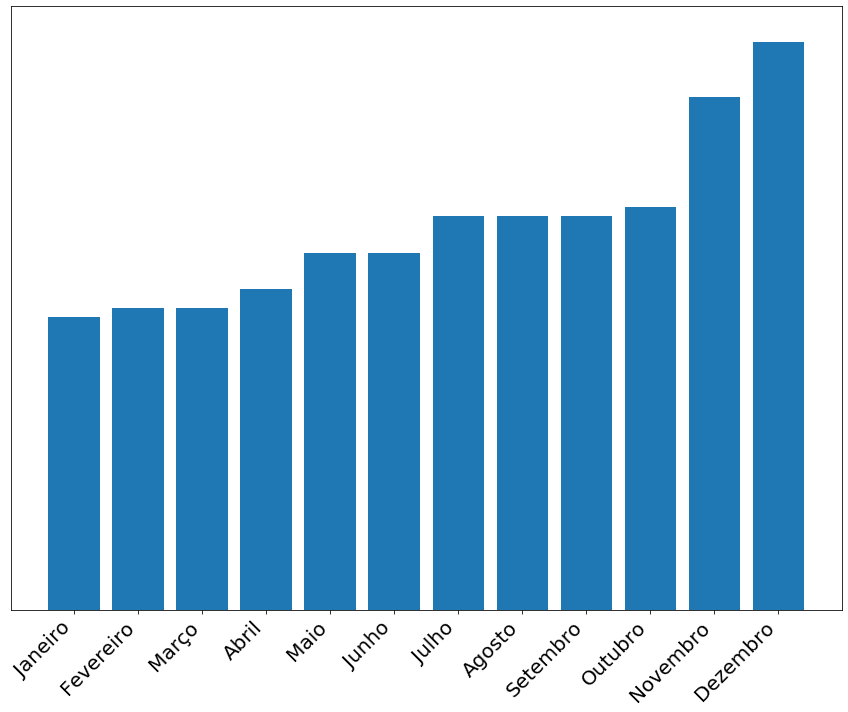

In [9]:
plot_months('/home/otavio/ml/datasets/trends/trends-19-05/camisa.csv', 15, 'camiseta')

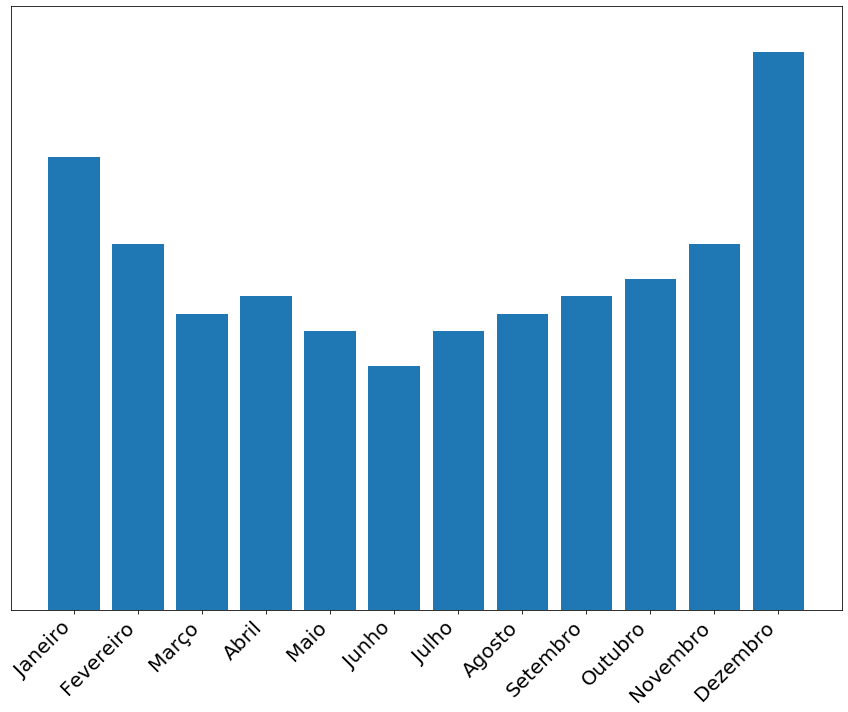

In [10]:
plot_months('/home/otavio/ml/datasets/trends/trends-19-05/cerveja.csv', 20, 'cerveja')

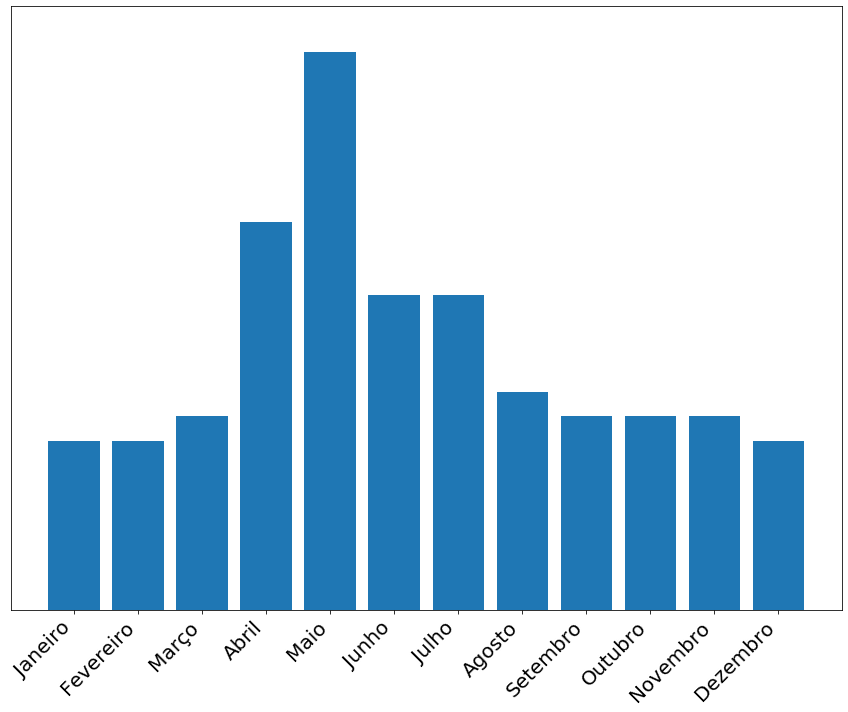

In [14]:
plot_months('/home/otavio/ml/datasets/trends/trends-19-05/pijama.csv', 15, 'pijama')

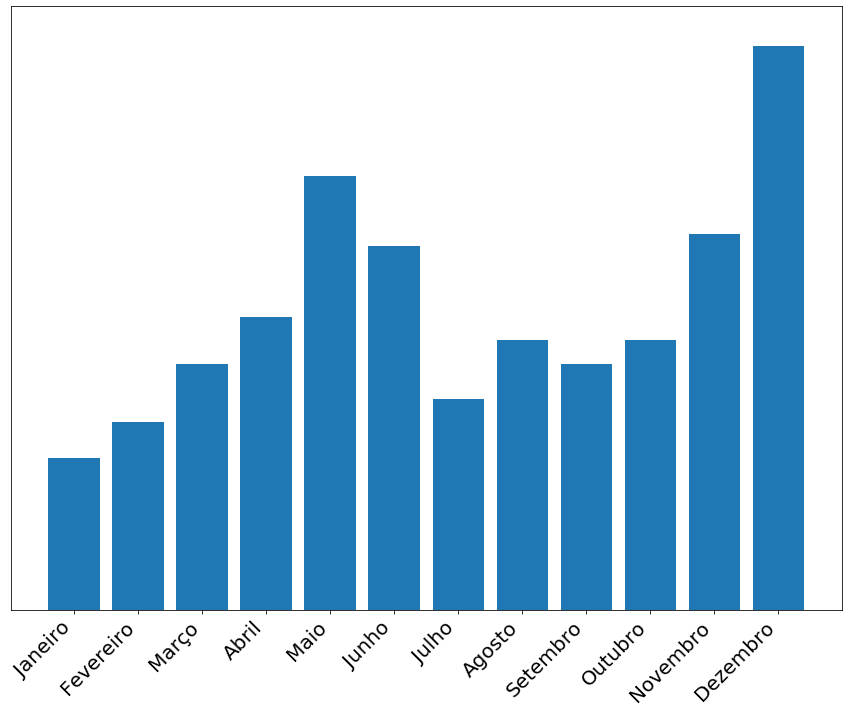

In [12]:
plot_months('/home/otavio/ml/datasets/trends/trends-19-05/presentes.csv', 20, 'presentes')